In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation
animation.writers.list()

base_url = r'/home/amit/DataScienceProject/PredictDroughts/'

In [3]:
df = pd.read_csv(base_url + 'files/merge.csv', index_col=0, encoding="ISO-8859-1")
df

,Week,State,Postal Code,Fips,Longitude,Latitude,PRECTOT,WS10M_MIN,QV2M,T2M_RANGE,...,WS50M_RANGE,WS50M_MAX,WS10M_MAX,WS10M_RANGE,PS,T2MDEW,T2M_MIN,T2MWET,Aland_SQMI,LEVEL
0,2000-01-04,Alabama,AL,1,-86.902298,32.318231,12.35,2.14,6.84,15.39,...,5.24,8.80,5.44,3.30,100.72,6.95,2.85,6.97,31400.1046,1
1,2000-01-11,Alabama,AL,1,-86.902298,32.318231,0.97,1.18,7.09,13.70,...,4.09,6.18,2.51,1.33,100.83,8.89,5.91,8.89,31400.1046,1
2,2000-01-18,Alabama,AL,1,-86.902298,32.318231,1.80,1.59,9.91,6.50,...,2.75,6.29,3.87,2.28,100.82,13.94,11.96,13.94,31400.1046,1
3,2000-01-25,Alabama,AL,1,-86.902298,32.318231,0.00,2.20,2.15,10.89,...,3.71,7.61,4.35,2.16,100.53,-7.34,-4.39,-7.14,31400.1046,1
4,2000-02-01,Alabama,AL,1,-86.902298,32.318231,0.01,0.73,3.38,15.38,...,5.12,6.04,2.41,1.69,101.43,-1.58,-3.99,-1.55,31400.1046,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56787,2021-05-11,Wyoming,WY,56,-107.290284,43.075968,0.70,2.00,3.90,10.46,...,4.09,7.08,6.11,4.11,81.57,-2.45,-2.92,0.02,60197.7468,2
56788,2021-05-18,Wyoming,WY,56,-107.290284,43.075968,0.00,0.47,6.54,17.38,...,6.01,6.73,3.36,2.89,80.75,4.49,6.61,10.45,60197.7468,1
56789,2021-05-25,Wyoming,WY,56,-107.290284,43.075968,0.11,0.95,5.07,16.60,...,7.49,9.18,6.45,5.50,81.35,1.03,3.02,6.50,60197.7468,1
56790,2021-06-01,Wyoming,WY,56,-107.290284,43.075968,1.19,1.75,7.33,12.02,...,3.61,6.54,4.33,2.58,81.70,6.35,9.74,11.27,60197.7468,1


In [4]:
df_state = df.copy()
df_state = df_state.rename(columns={"Fips": "GeoId"})
df_state = df_state[['GeoId', 'Aland_SQMI', 'Longitude', 'Latitude']]
df_state

,GeoId,Aland_SQMI,Longitude,Latitude
0,1,31400.1046,-86.902298,32.318231
1,1,31400.1046,-86.902298,32.318231
2,1,31400.1046,-86.902298,32.318231
3,1,31400.1046,-86.902298,32.318231
4,1,31400.1046,-86.902298,32.318231
...,...,...,...,...
56787,56,60197.7468,-107.290284,43.075968
56788,56,60197.7468,-107.290284,43.075968
56789,56,60197.7468,-107.290284,43.075968
56790,56,60197.7468,-107.290284,43.075968


In [5]:
df_drought = pd.read_csv(base_url + 'files/drought.csv', index_col=0)
df_drought

,State,Postal code,Fips,Week,None,D0-D4,D1-D4,D2-D4,D3-D4,D4,DSCI,LEVEL
0,Alabama,AL,1,2000-01-04,0.00,100.00,47.98,16.35,0.00,0.0,164,1
1,Alabama,AL,1,2000-01-11,0.00,100.00,76.88,4.24,0.00,0.0,181,1
2,Alabama,AL,1,2000-01-18,0.00,100.00,75.71,4.24,0.00,0.0,180,1
3,Alabama,AL,1,2000-01-25,0.00,100.00,75.67,4.79,0.00,0.0,180,1
4,Alabama,AL,1,2000-02-01,0.00,100.00,50.07,0.17,0.00,0.0,150,1
...,...,...,...,...,...,...,...,...,...,...,...,...
58235,Wyoming,WY,56,2021-05-18,10.89,89.11,70.75,27.15,2.01,0.0,189,1
58236,Wyoming,WY,56,2021-05-25,10.89,89.11,66.56,24.87,1.98,0.0,183,1
58237,Wyoming,WY,56,2021-06-01,10.89,89.11,68.06,24.28,1.98,0.0,183,1
58238,Wyoming,WY,56,2021-06-08,9.76,90.24,72.28,27.12,6.32,0.0,196,1


In [6]:
df_drought['Week'] = pd.to_datetime(df_drought['Week'], format='%Y-%m-%d')
df_drought = df_drought.drop(columns=['State'], axis=1)
df_drought = df_drought.set_index('Week').groupby(['Fips']).resample('M').mean().reset_index(level=1)
df_drought = df_drought.rename_axis(None)
df_drought

,Week,Fips,None,D0-D4,D1-D4,D2-D4,D3-D4,D4,DSCI,LEVEL
1,2000-01-31,1.0,0.000000,100.000000,69.060000,7.4050,0.000,0.0,176.250000,1.0
1,2000-02-29,1.0,0.000000,100.000000,50.822000,2.4000,0.000,0.0,153.400000,1.0
1,2000-03-31,1.0,0.000000,100.000000,58.447500,17.8975,0.000,0.0,176.250000,1.0
1,2000-04-30,1.0,26.450000,73.550000,41.185000,9.4475,0.000,0.0,124.250000,1.0
1,2000-05-31,1.0,16.558000,83.442000,64.236000,36.0860,8.512,0.0,192.200000,1.6
...,...,...,...,...,...,...,...,...,...,...
72,2021-02-28,72.0,74.687500,25.312500,10.140000,0.0000,0.000,0.0,35.250000,0.0
72,2021-03-31,72.0,65.312000,34.688000,12.712000,0.0000,0.000,0.0,47.600000,0.0
72,2021-04-30,72.0,61.897500,38.102500,6.150000,0.0000,0.000,0.0,44.250000,0.0
72,2021-05-31,72.0,28.895000,71.105000,18.197500,0.0000,0.000,0.0,89.250000,0.0


In [7]:
dr_final = pd.merge(df_drought, df_state, left_on='Fips', right_on='GeoId', how='inner', sort='False')
dr_final = dr_final[['Fips', 'Week', 'Aland_SQMI', 'LEVEL', 'Longitude', 'Latitude']]
dr_final = dr_final.sort_values('Week').reset_index(drop=True)
dr_final = dr_final.groupby('Fips')
dr_final

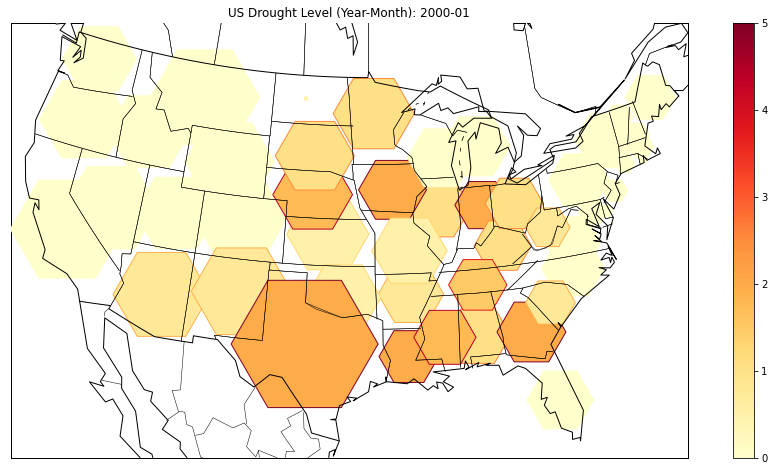

In [10]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
m = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45, lon_0=-95)
m.drawcoastlines()
m.drawmapboundary(zorder=0)
m.fillcontinents(color='#ffffff',zorder=1)
m.drawcountries(linewidth=1)
m.drawstates()

x, y = m(dr_final.nth(0).Longitude.tolist(), dr_final.nth(0).Latitude.tolist())
colors = (dr_final.nth(0).LEVEL).tolist()
sizes = (dr_final.nth(0).Aland_SQMI / 7.5).tolist()
cmap = plt.cm.YlOrRd
sm = ScalarMappable(cmap=cmap)
plt.title('US Drought Level (Year-Month): ' + dr_final.nth(0).Week.iloc[0].strftime('%Y-%m'))

scatter = ax.scatter(x, y, s=sizes, c=colors, cmap=cmap, alpha=1, edgecolors='face', marker='H', vmax=5, vmin=0, zorder=1.5)
plt.colorbar(scatter)

def update(ii):
    colors = (dr_final.nth(ii).LEVEL).tolist()
    scatter.set_color(sm.to_rgba(colors))
    plt.title('US Drought Level (Year-Month): '+dr_final.nth(ii).Week.iloc[0].strftime('%Y-%m'))
    return scatter,  

anim = animation.FuncAnimation(plt.gcf(), update, interval=200, repeat=False, frames=203, blit=True, save_count=1500)
anim.save('Heatmap_animation_US_Drought.mp4', fps=30, extra_args=['-vcodec', 'libx264'])